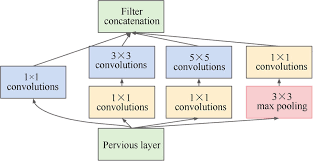

In [ ]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
class conv_block(keras.Model):
  def __init__(self,out_channels, **kwargs):
    super(conv_block,self).__init__()
    self.relu = tf.keras.layers.ReLU()
    self.conv = tf.keras.layers.Conv2D(filters = out_channels, **kwargs) #kernel_size
    self.batchnorm = layers.BatchNormalization()
#tf.nn.conv2d(input, filters, strides, padding, data_format='NHWC', dilations=None,name=None)
  
  def call(self, inputs):
    x = self.conv(inputs)
    x = self.relu(self.batchnorm(x))
    return x


In [ ]:
class InceptionModule(keras.Model):
  def __init__(self,out_11, red_33, out_33, red_55, out_55, out_11_P):
    super(InceptionModule,self).__init__()
    self.out_11 = out_11
    self.out_33 = out_33
    self.out_55 = out_55
    self.out_11_P = out_11_P
    self.red_33 = red_33
    self.red_55 = red_55

    self.branch1 = conv_block(out_11,kernel_size=(1,1))

    self.branch2 = keras.Sequential([conv_block(red_33,kernel_size= (1,1)),
                                     conv_block(out_33 ,kernel_size=(3,3), padding="SAME")
    ])
    self.branch3 = keras.Sequential([conv_block(red_55,kernel_size=(1,1)),
                                     conv_block(out_55,kernel_size= (5,5), padding="SAME")
    ])
    self.branch4 = keras.Sequential([layers.MaxPool2D((3,3),strides=1, padding="SAME"),
                                     conv_block(out_11_P,kernel_size=(1,1))
    ])
    
  def call(self, inputs):
    #print(inputs.shape)
    # N * filters * 28 * 28
    x = layers.concatenate([self.branch1(inputs),self.branch2(inputs)], axis=3)
    #print(x.shape)
    y = layers.concatenate([self.branch3(inputs),self.branch4(inputs)], axis=3)
    #print(y.shape)
    z = layers.concatenate([x,y], axis=3)
    return z

In [ ]:
class GoogleNet(keras.Model):

  def __init__(self,num_classes=1000,**kwargs):
    super (GoogleNet, self).__init__()
    self.conv1= conv_block(64,kernel_size= (7,7),padding="SAME", strides=(2,2))
    #self.conv1 = tf.keras.layers.Conv2D(64, (7,7), padding="SAME", strides=(2,2))
    self.pool1 = layers.MaxPool2D((3,3), strides=(2,2), padding="SAME")
    self.conv2= conv_block(192,kernel_size= (3,3),padding="SAME", strides=(1,1))
    #self.conv2= tf.keras.layers.Conv2D(192, (3,3), padding="SAME", strides=(1,1))
    self.pool2 = layers.MaxPool2D((3,3), strides=(2,2), padding="SAME")
    #Order : in_channels, out_11, red_33, out_33, red_55, out_55, out_11_P
    self.inception3a=InceptionModule(64,96,128,16,32,32)
    self.inception3b=InceptionModule(128,128,192,32,96,64)
    self.pool3 = layers.MaxPool2D((3,3), strides=(2,2), padding="SAME")
   
    self.inception4a=InceptionModule(192,96,208,16,48,64)
    self.inception4b=InceptionModule(112,224,24,24,64,64)
    self.inception4c=InceptionModule(128,128,256,24,64,64)
    self.inception4d=InceptionModule(112,144,288,32,64,64)
    self.inception4e=InceptionModule(256,160,320,32,128,128)
    self.pool4 = layers.MaxPool2D((3,3), strides=(2,2), padding="SAME")

    self.inception5a=InceptionModule(256,160,320,32,128,128)
    self.inception5b=InceptionModule(384,192,384,48,128,128)
    self.pool5= layers.AvgPool2D((7,7),strides=1)
    self.fc = layers.Dense(num_classes)
    #self.dropout= layers.Dropout(p=0.3)
    
    
    
  def call(self, inputs):
    x = self.conv1(inputs)
    x = self.pool1(x)

    x = self.conv2(x)
    x = self.pool2(x)

    x = self.inception3a(x)
    x = self.inception3b(x)
    x = self.pool3(x)

    x = self.inception4a(x)
    x = self.inception4b(x)
    x = self.inception4c(x)
    x = self.inception4d(x)
    x = self.inception4e(x)
    x = self.pool4(x)

    x = self.inception5a(x)
    x = self.inception5b(x)
    x = self.pool5(x)
#    x = self.dropout(Flatten()(x))
    x = self.fc(layers.Flatten()(x))

    return x

In [ ]:
#Test
if __name__=='__main__':
  inputs = tf.random.uniform((3,224,224,3))
  ml = GoogleNet(num_classes=1000)
  model = tf.keras.Sequential([ml])
  print(model(inputs).shape)

(3, 1000)


In [ ]:
# You can also use the conv layers using the keras api, without coding the conv_block

In [ ]:
# Useful link: https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/43022.pdf

In [ ]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
class InceptionModule(keras.Model):
  def __init__(self,out_11, red_33, out_33, red_55, out_55, out_11_P):
    super(InceptionModule,self).__init__()
    self.out_11 = out_11
    self.out_33 = out_33
    self.out_55 = out_55
    self.out_11_P = out_11_P
    self.red_33 = red_33
    self.red_55 = red_55

    self.branch1 = tf.keras.layers.Conv2D(out_11,(1,1))

    self.branch2 = keras.Sequential([tf.keras.layers.Conv2D(red_33, (1,1)),
                                     tf.keras.layers.Conv2D(out_33 ,(3,3), padding="SAME")
    ])
    self.branch3 = keras.Sequential([tf.keras.layers.Conv2D(red_55, (1,1)),
                                     tf.keras.layers.Conv2D(out_55, (5,5), padding="SAME")
    ])
    self.branch4 = keras.Sequential([layers.MaxPool2D((3,3),strides=1, padding="SAME"),
                                     tf.keras.layers.Conv2D(out_11_P,(1,1))
    ])
    
  def call(self, inputs):
    #print(inputs.shape)
    # N * filters * 28 * 28
    x = layers.concatenate([self.branch1(inputs),self.branch2(inputs)], axis=3)
    #print(x.shape)
    y = layers.concatenate([self.branch3(inputs),self.branch4(inputs)], axis=3)
    #print(y.shape)
    z = layers.concatenate([x,y], axis=3)
    return z

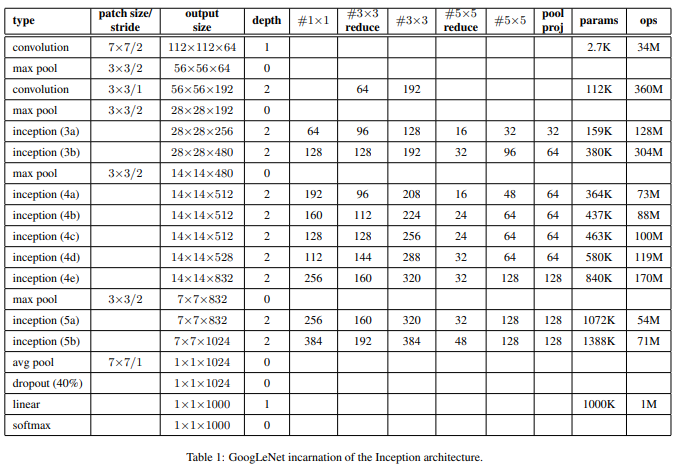

In [ ]:
class GoogleNet(keras.Model):

  def __init__(self,num_classes=1000,**kwargs):
    super (GoogleNet, self).__init__()
    self.conv1= tf.keras.layers.Conv2D(64, (7,7), padding="SAME", strides=(2,2))
    self.pool1 = layers.MaxPool2D((3,3), strides=(2,2), padding="SAME")
    self.conv2= tf.keras.layers.Conv2D(192, (3,3), padding="SAME", strides=(1,1))
    self.pool2 = layers.MaxPool2D((3,3), strides=(2,2), padding="SAME")
    #Order : in_channels, out_11, red_33, out_33, red_55, out_55, out_11_P
    self.inception3a=InceptionModule(64,96,128,16,32,32)
    self.inception3b=InceptionModule(128,128,192,32,96,64)
    self.pool3 = layers.MaxPool2D((3,3), strides=(2,2), padding="SAME")
   
    self.inception4a=InceptionModule(192,96,208,16,48,64)
    self.inception4b=InceptionModule(112,224,24,24,64,64)
    self.inception4c=InceptionModule(128,128,256,24,64,64)
    self.inception4d=InceptionModule(112,144,288,32,64,64)
    self.inception4e=InceptionModule(256,160,320,32,128,128)
    self.pool4 = layers.MaxPool2D((3,3), strides=(2,2), padding="SAME")

    self.inception5a=InceptionModule(256,160,320,32,128,128)
    self.inception5b=InceptionModule(384,192,384,48,128,128)
    self.pool5= layers.AvgPool2D((7,7),strides=1)
    self.fc = layers.Dense(num_classes)
    #self.dropout= layers.Dropout(p=0.3)
    

  def call(self, inputs):
    x = self.conv1(inputs)
    x = self.pool1(x)

    x = self.conv2(x)
    x = self.pool2(x)

    x = self.inception3a(x)
    x = self.inception3b(x)
    x = self.pool3(x)

    x = self.inception4a(x)
    x = self.inception4b(x)
    x = self.inception4c(x)
    x = self.inception4d(x)
    x = self.inception4e(x)
    x = self.pool4(x)

    x = self.inception5a(x)
    x = self.inception5b(x)
    x = self.pool5(x)
#    x = self.dropout(Flatten()(x))
    x = self.fc(layers.Flatten()(x))

    return x

In [ ]:
#Test
if __name__=='__main__':
  inputs = tf.random.uniform((3,224,224,3))
  ml = GoogleNet(num_classes=1000)
  model = tf.keras.Sequential([ml])
  print(model(inputs).shape)


(3, 1000)
